# Machine Learning Unsupervised Learning


##  Empezando
En este proyecto, analizará un conjunto de datos que contienen datos sobre los montos de gastos anuales de diversos clientes (informados en unidades monetarias) de diversas categorías de productos para la estructura interna. Uno de los objetivos de este proyecto es describir mejor la variación en los diferentes tipos de clientes con los que interactúa un distribuidor mayorista. Hacerlo equiparía al distribuidor con una idea de cómo estructurar mejor su servicio de entrega para satisfacer las necesidades de cada cliente.

El conjunto de datos para este proyecto se puede encontrar en el Repositorio de aprendizaje automático de UCI. A los fines de este proyecto, las características 'Canal' y 'Región' se excluirán en el análisis, centrándose en cambio en las seis categorías de productos registradas para los clientes.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from IPython.display import display # Allows the use of display() for DataFrames

data = pd.read_csv("customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

print(data.isnull().sum(),data.head())

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [2]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


## Exploración de los Datos

En esta sección, comenzará a explorar los datos a través de visualizaciones y códigos para comprender cómo cada característica se relaciona con las demás. Observará una descripción estadística del conjunto de datos, considerará la relevancia de cada característica y seleccionará algunos puntos de datos de muestra del conjunto de datos que seguirá durante el transcurso de este proyecto.

Ejecute el siguiente bloque de código para observar una descripción estadística del conjunto de datos. Tenga en cuenta que el conjunto de datos se compone de seis categorías de productos importantes: ** "Fresh" **, ** "Milk" **, ** "Grocery" **, ** "Frozen" **, ** "Detergents_Paper" * * y * *"Delicatessen"** . Considere lo que cada categoría representa en términos de productos que podría comprar.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

### Visualizar distribuciones de funciones
Para obtener una mejor comprensión del conjunto de datos, podemos construir una matriz de dispersión de cada una de las seis características del producto presentes en los datos.

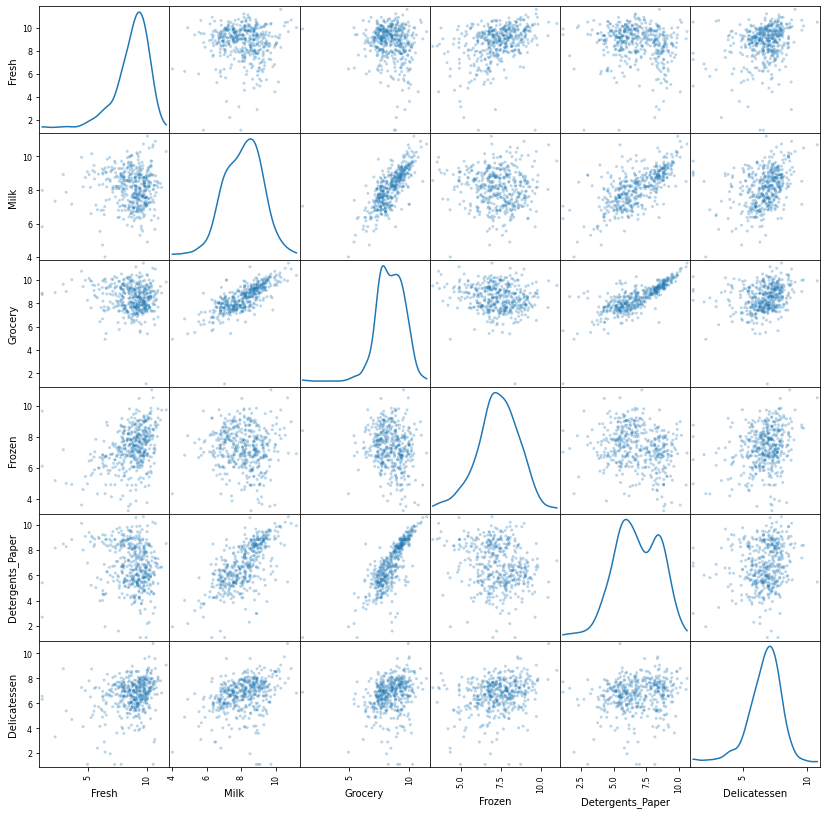

In [5]:
# Produce a scatter matrix for each pair of features in the data
graf = scatter_matrix(np.log(data), alpha = 0.3, figsize = (14,14), diagonal = 'kde')

import warnings
warnings.filterwarnings('ignore')

### Implementación: detección de valores atípicos
La detección de valores atípicos en los datos es extremadamente importante en el paso de preprocesamiento de datos de cualquier análisis. La presencia de valores atípicos a menudo puede sesgar los resultados que toman en consideración estos puntos de datos. El * paso atípico * se calcula como 1.5 veces el rango intercuartílico (IQR). Un punto de datos con una característica que está más allá de un paso atípico fuera del IQR para esa característica se considera anormal.

En el siguiente bloque de código:
 - Asigne el valor del percentil 25 para la característica dada a `Q1`. Use `np.percentile` para esto.
 - Asigne el valor del percentil 75 para la característica dada a `Q3`. Nuevamente, use `np.percentile`.
 - Asignar el cálculo de un paso atípico para la característica dada a `paso`.
 - Opcionalmente eliminar puntos de datos del conjunto de datos al agregar índices a la lista `outliers`


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(data)
standarizar = scaler.transform(data)
standarizar1 = pd.DataFrame(standarizar,columns=list(data.columns))
zscore_df = standarizar1
zscore_df.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461


In [7]:
r = zscore_df
Q1 = r.quantile(0.25)
Q3 = r.quantile(0.75)
IQR = Q3 - Q1
#print(Q1)
#print(Q3)
#print(IQR)

Data_SO = r[~((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR))).any(axis=1)]
Data_CO = r[((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Data_SO.shape,Data_CO.shape)

(332, 6) (108, 6)


### Algoritmos No Supervisados

#### Comenzamos con K-means

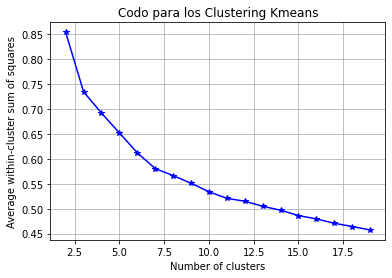

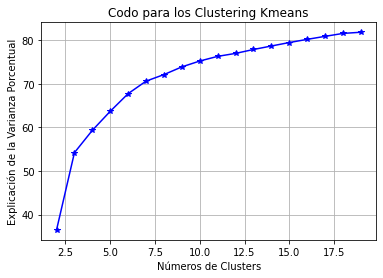

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

DATA= Data_SO #cambian el dataframe

K = range(2,20)
KM = [KMeans(n_clusters=k,random_state=10).fit(DATA.values) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(DATA.values, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/DATA.values.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = np.sum((DATA.values-DATA.values.mean(0))**2)
bss = tss-wcss

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')

plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Codo para los Clustering Kmeans')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Números de Clusters')
plt.ylabel('Explicación de la Varianza Porcentual')
plt.title('Codo para los Clustering Kmeans')
plt.show()

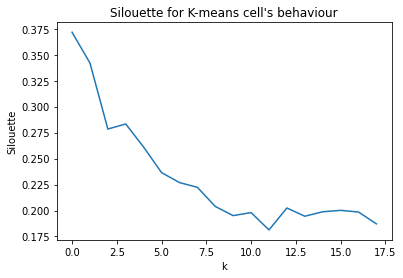

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
s = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(Data_SO.values)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(DATA.values, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
#sns.despine()
plt.show()

### Comparar CLUSTERING ALGORITHMS

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn import cluster
#import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

k_clusters = 5
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters,random_state=10)
algorithms['affinity'] = AffinityPropagation(damping=0.6)
algorithms['DBSCAN'] =   DBSCAN(eps=0.6)



for model in algorithms.values():
    print(model)
    model.fit(DATA)
    results.append(list(model.labels_))

KMeans(n_clusters=5, random_state=10)
AffinityPropagation(damping=0.6)
DBSCAN(eps=0.6)


## METRICS & PLOTTING

In [12]:
metricas = []

# Append the results into lists
for i in range(3):
    metricas.append(silhouette_score(Data_SO.values, results[i], metric='euclidean'))

xlabels = list(algorithms.keys())
xlabels
resultados = pd.concat([pd.DataFrame(xlabels,columns=['algorithms']),pd.DataFrame(metricas,columns=['Metricas'])],axis=1)
resultados


,algorithms,Metricas
0,kmeans,0.283306
1,affinity,0.185602
2,DBSCAN,0.260126


In [13]:
Data_SO.reset_index(inplace=True)
Data_CO.reset_index(inplace=True)

In [14]:
Data_SO

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
3,5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
4,6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
...,...,...,...,...,...,...,...
327,432,0.721661,-0.628632,-0.336826,-0.578025,-0.326197,-0.401104
328,433,-0.793029,-0.349738,-0.680366,-0.315711,-0.530295,-0.026934
329,434,0.374473,-0.254242,0.004501,-0.491618,-0.107192,-0.243839
330,438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [15]:
Data_SO_ = Data_SO.drop(['index'],axis=1)

kmeans = KMeans(n_clusters=5,random_state=10)
kmeans.fit(Data_SO_.values)
centroids = kmeans.cluster_centers_
kmeans.labels_

PERFIL =  pd.DataFrame({'PERFIL':kmeans.labels_})
data_SO1 = pd.concat([Data_SO.reset_index(drop=True), PERFIL], axis=1)
data_SO1.head()

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,PERFIL
0,0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3
2,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,4
3,5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,3
4,6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854,3


In [16]:
data_SO1.shape

(332, 8)

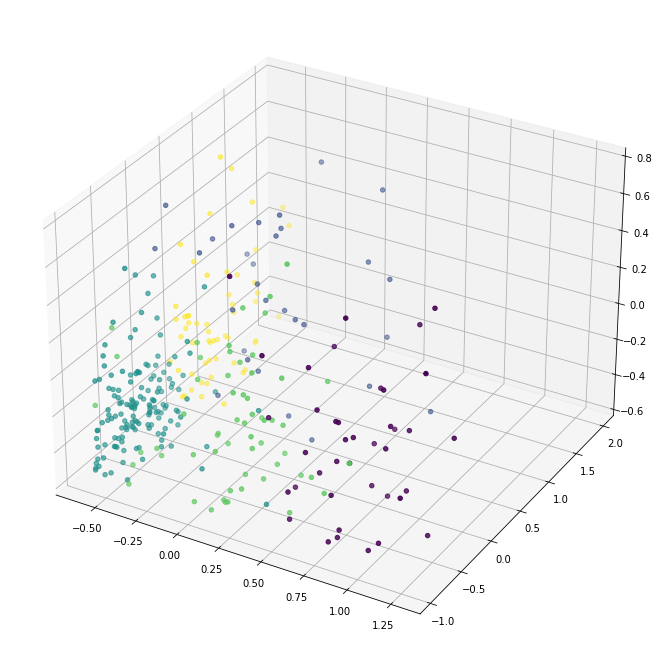

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_SO1.Detergents_Paper, data_SO1.Fresh, data_SO1.Delicatessen, c=data_SO1.PERFIL)

### Reasignación de outliters

In [18]:
Data_CO.head()

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
1,4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
2,17,-0.484788,0.048933,-0.528665,-0.460479,-0.527355,1.048362
3,22,1.525828,-0.526217,-0.366851,1.306634,-0.105092,0.997242
4,23,1.137716,4.154476,1.482005,0.429367,0.305623,5.324340


In [19]:
Data_CO_ = Data_CO.drop(['index'],axis=1)
predict  = kmeans.predict(Data_CO_)
predict

PERFIL =  pd.DataFrame({'PERFIL':predict})
Data_CO1 = pd.concat([Data_CO.reset_index(drop=True), PERFIL], axis=1)
Data_CO1.head()

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,PERFIL
0,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
1,4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1
2,17,-0.484788,0.048933,-0.528665,-0.460479,-0.527355,1.048362,2
3,22,1.525828,-0.526217,-0.366851,1.306634,-0.105092,0.997242,4
4,23,1.137716,4.154476,1.482005,0.429367,0.305623,5.324340,1


In [20]:
Data_CO1.shape

(108, 8)

In [21]:
DATA_PERFIL_ESTAN = data_SO1.append(Data_CO1)
DATA_PERFIL_ESTAN.head()

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,PERFIL
0,0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3
2,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,4
3,5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,3
4,6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854,3


In [22]:
DATA_PERFIL_ESTAN.shape

(440, 8)

In [23]:
DATA_PERFIL_ESTAN

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,PERFIL
0,0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3
2,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,4
3,5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,3
4,6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854,3
...,...,...,...,...,...,...,...,...
103,427,1.504930,1.477314,-0.265717,2.476735,-0.512867,-0.128464,4
104,431,-0.274465,-0.039374,-0.294055,2.147605,-0.315909,-0.009539,2
105,435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
106,436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,4


In [24]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [25]:
data.reset_index(inplace=True)
data.head()

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,12669,9656,7561,214,2674,1338
1,1,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,4,22615,5410,7198,3915,1777,5185


In [26]:
DATA_PERFIL_FINAL = pd.merge(data,DATA_PERFIL_ESTAN[['index','PERFIL']],on=['index'],how='inner')
DATA_PERFIL_FINAL.head()

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,PERFIL
0,0,12669,9656,7561,214,2674,1338,1
1,1,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,1
3,3,13265,1196,4221,6404,507,1788,4
4,4,22615,5410,7198,3915,1777,5185,1


### Descripción de los perfiles

In [1]:
DESCRIPCION_ = DATA_PERFIL_FINAL.drop(['index'],axis=1)
DESCRIPCION_ = DESCRIPCION_.groupby(['PERFIL'], as_index=False).mean()
conteo = 100 * DATA_PERFIL_FINAL['PERFIL'].value_counts() / len(DATA_PERFIL_FINAL['PERFIL'])
conteo = pd.DataFrame(conteo)
conteo
conteo = conteo.rename(index=str, columns={"PERFIL": "CANTIDAD%"})
CANTIDAD =  conteo.sort_index(axis=0, level=None, ascending=True)
DESCRIPCION_FINAL = pd.concat([CANTIDAD.reset_index(drop=True), DESCRIPCION_], axis=1)
DESCRIPCION_FINAL 

NameError: name 'DATA_PERFIL_FINAL' is not defined

In [28]:
DATA_PERFIL_FINAL.shape

(440, 8)